# TASK - 6

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Fraud Detection.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df['isFraud'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64>

In [9]:
df['type'] == "PAYMENT"

0           True
1           True
2          False
3          False
4           True
           ...  
1048570    False
1048571     True
1048572     True
1048573     True
1048574     True
Name: type, Length: 1048575, dtype: bool

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
cond1 = df['type'] == "DEBIT"
cond2 = df['amount'] >= 1864
df[cond1 & cond2]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0,0
59,1,DEBIT,5529.13,C867288517,8547.0,3017.87,C242131142,10206.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048342,95,DEBIT,5106.11,C1413127670,39824.0,34717.89,C1053563847,2777373.30,2782479.42,0,0
1048453,95,DEBIT,8517.90,C541482717,43290.0,34772.10,C1658266097,132773.47,141291.37,0,0
1048546,95,DEBIT,2368.49,C855991004,289.0,0.00,C1932870004,666959.45,669327.94,0,0
1048549,95,DEBIT,9983.95,C130161561,997.0,0.00,C740635949,2341925.24,2351909.19,0,0


In [15]:
cond1 = df['oldbalanceDest'].between(16997, 157982)
df[cond1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.0,0.00,0,0
21,1,DEBIT,9302.79,C1566511282,11299.00,1996.21,C1973538135,29832.0,16896.70,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.0,64106.18,0,0


In [13]:
cond1 = df.groupby('type')['isFlaggedFraud'].count()
cond1

type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: isFlaggedFraud, dtype: int64

# FOR VISUALIZATION

In [14]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

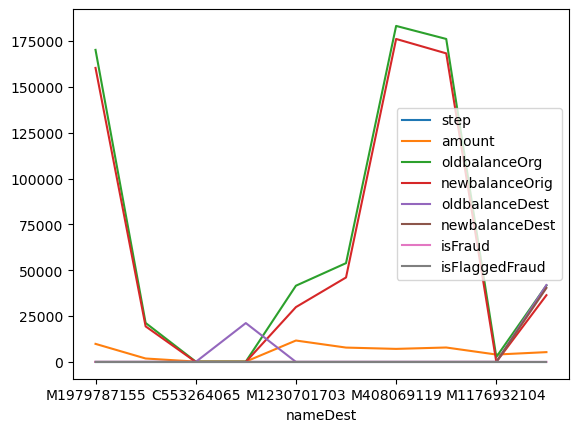

In [18]:
a=df.set_index('nameDest').head(10)
a
a.plot()
plt.show

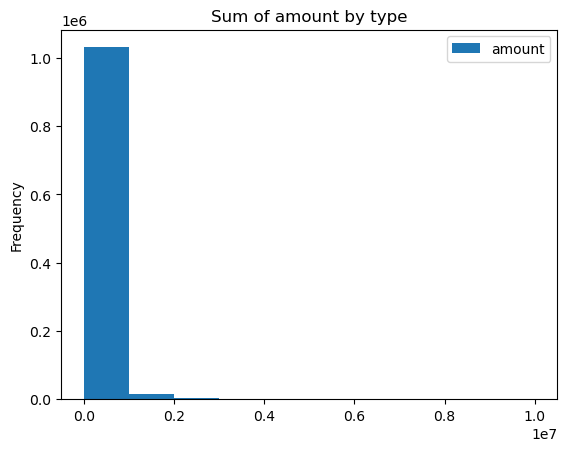

In [19]:
df.plot(kind = 'hist' , x= 'type', y = 'amount')
plt.title('Sum of amount by type')
plt.show()